In [1]:
import pandas as pd
exam_data = pd.read_csv("StudentsPerformance.csv")
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Since there is not any null values. So I guess, I wouldn't have to clean the dataset. But let's map the values to the datasets.


In [2]:
# Function that would map the string value of parental education to interger
def refine_ParentalEdu(value):
    count =0
    if(value == "master's degree"):
        count = 6
    elif (value == "bachelor's degree"):
        count = 5
    elif(value == "associate's degree"):
        count =4
    elif(value == "some college"):
        count =3
    elif(value == "high school"):
        count =2
    else:
        count =1
    return count


def gender(val):
    if(val=="female"):
        return 0
    else:
        return 1
def test_prep(val):
    if(val == 'completed'):
        return 1
    else:
        return 0
def avg(math,read, writing):
    return (math+read+writing)//3
#Mapping the integer values to string values of Parent education 
parental_int = exam_data["parental level of education"]
values = [refine_ParentalEdu(x) for x in parental_int]
exam_data["parent_level"] =values

#Mapping the integer values to string values of Gender 
gender_int = exam_data["gender"]
value = [gender(x) for x in gender_int]
exam_data["gender_int"] =value


#Adding one more column for the avergae value for math, writing and reading score
avg_score= []
math_score = exam_data["math score"]
read_score = exam_data["reading score"]
write_score = exam_data["writing score"]
for i in range(len(math_score)):
     avg_score.append(avg(math_score[i],read_score[i],write_score[i]))
exam_data['avg_score'] = avg_score

#checks the test prep
test_int = exam_data["test preparation course"]
test_value = [test_prep(x) for x in test_int]
exam_data["test_int"] =test_value

exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parent_level,gender_int,avg_score,test_int
0,female,group B,bachelor's degree,standard,none,72,72,74,5,0,72,0
1,female,group C,some college,standard,completed,69,90,88,3,0,82,1
2,female,group B,master's degree,standard,none,90,95,93,6,0,92,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,4,1,49,0
4,male,group C,some college,standard,none,76,78,75,3,1,76,0


## Partition
Let's check some of the data columns and do the scatter plot for the decision tree. For this partition I want to do Gender and Parental level of education with the target of Average score of writing, reading and Math score. I wanted to do the ethnicity but it is defined as the groups so I guess it won't be a better one.

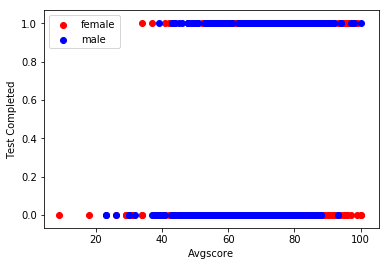

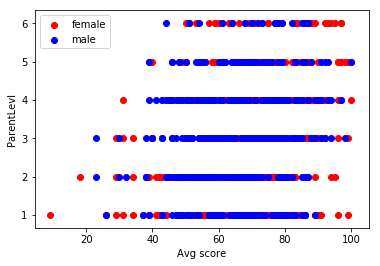

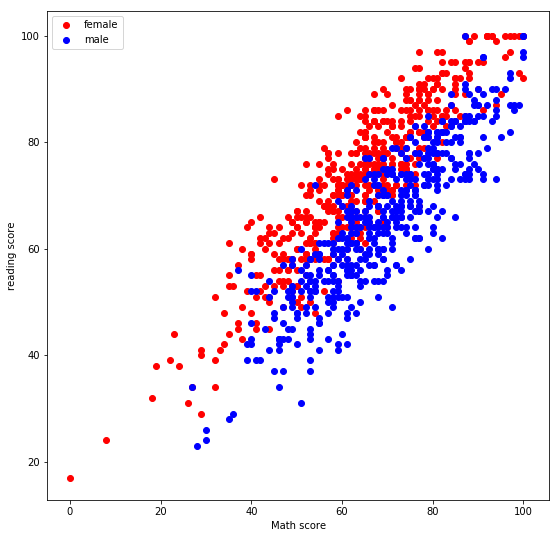

In [3]:
# partition the data set by Classification
import numpy as np
import matplotlib.pyplot as plt
#Classification: Average score, gender and Test Completed
female= np.ma.masked_where(exam_data['gender_int'] != 0, exam_data['avg_score'])
male= np.ma.masked_where(exam_data['gender_int'] != 1, exam_data['avg_score'])
# do a scatter plot

plt.scatter(female, exam_data['test_int'], color="red")
plt.scatter(male, exam_data['test_int'],  color="blue")
plt.xlabel("Avgscore")
plt.ylabel("Test Completed")
plt.legend(["female","male"])
plt.show()

#Classification: Math score, gender and Parent level
female= np.ma.masked_where(exam_data['gender_int'] != 0, exam_data['avg_score'])
male= np.ma.masked_where(exam_data['gender_int'] != 1, exam_data['avg_score'])
# do a scatter plot
plt.scatter(female, exam_data['parent_level'], color="red")
plt.scatter(male, exam_data['parent_level'],  color="blue")
plt.xlabel("Avg score")
plt.ylabel("ParentLevl")
plt.legend(["female","male"])
plt.show()

female= np.ma.masked_where(exam_data['gender_int'] != 0, exam_data['math score'])
male= np.ma.masked_where(exam_data['gender_int'] != 1, exam_data['math score'])
# do a scatter plot
plt.figure(3,figsize=(9,9))
plt.scatter(female, exam_data['reading score'], color="red")
plt.scatter(male, exam_data['reading score'],  color="blue")

plt.xlabel("Math score")
plt.ylabel("reading score")
plt.legend(["female","male"])
plt.show()

## Result:
Looking at the scatter plot it looks like the Math Score and Reading Score can be more decisive for the gender than that of others. I guess I will see gender, reading score and parental level as X and math score as target. The above scatter plot clarify it more efficiently.

## Decision Tree

In [4]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
X = exam_data[['gender_int','parent_level', 'reading score','test_int']]
y = exam_data['math score']

tree_classifier = DecisionTreeClassifier()
print(tree_classifier.fit(X,y))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


# Evaluation Matrix

In [5]:
from sklearn.metrics import confusion_matrix
y_predicted = tree_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted)
print(matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(y, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y, y_predicted, average="weighted"))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]
Accuracy is  0.673
Precision is  0.6998639606022166
Sensitivity is  0.673
F1 is  0.6720067637650167


C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Result: 
First, I have done X values with gender, parent level and test preparation course with the math score but it seems like the score is about 2%-3%. So, I added the reading sore in the X and the score hiked to From the matrix and metrices scores went to 69% which is better for this datasets, it is clear that the predicted value for math score is high when it depends on gender, parental level, test completed, and reading score. The given score still low. Might be due to underfitting. But to train model better i could add more feature but it might result overfitting in the data.

### SVM
The decision tree has computed the matrix and looks like nearly 70% of data can be predicted by the above decision tree. Let's see if we use SVM, a multiclassifier to predict the data more accurately. The SVM kernel will be using same X and y values.

In [6]:
from sklearn.svm import SVC
X = exam_data[['gender_int','parent_level', 'reading score','test_int']]
y = exam_data['math score']

svm_classifier = SVC(kernel="rbf")
svm_classifier.fit(X,y)

C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Mertices
Let's compute the confusion matrix and other scores using svm kernel

In [7]:
from sklearn.metrics import confusion_matrix
y_predicted = svm_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted)
print(matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(y, y_predicted))
print ("Precision is ", precision_score(y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y, y_predicted, average="weighted"))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 6]]
Accuracy is  0.268
Precision is  0.33164202321215525
Sensitivity is  0.268
F1 is  0.2432595654418108


C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Test Set
Let's Create a random test set to validate our model. We will look for the 750 model.

In [8]:
# create my data values
gender = np.random.randint(0, 2, 750)   
parent_level = np.random.randint(1, 7, 750)  
math_score = np.random.randint(1,100,750) 
read_score = np.random.randint(1,100,750)
test_prep = np.random.randint(0,2,750)



# create a dictionary with each feature
d = {}
d["gender_int"] = gender
d["parent_level"] = parent_level
d["test_int"] = test_prep
d["read_score"] = read_score
d["math_score"] = math_score

# Create the data frame from the dictionary
in_range_df = pd.DataFrame(data=d)
print(in_range_df.head())

   gender_int  parent_level  test_int  read_score  math_score
0           1             4         0           1          87
1           0             6         0          87          42
2           1             2         1          86           5
3           0             4         1          20          48
4           1             1         1          82          92


## Metrices:
### Lets see using Decision tree
Let's see confusion matrix and other metrices on the test sets

In [11]:
from sklearn.tree import DecisionTreeClassifier
X = in_range_df[['gender_int','parent_level', 'read_score','test_int']]
y = in_range_df['math_score']
tree_classifier = DecisionTreeClassifier()
(tree_classifier.fit(X,y))
from sklearn.metrics import confusion_matrix
y_predicted = tree_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted)
print(matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(y, y_predicted))
print ("F1 is ", f1_score(y, y_predicted, average="weighted"))
print ("Precision is ", precision_score(y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y, y_predicted, average="weighted"))

[[5 0 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 6 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 7]]
Accuracy is  0.8386666666666667
F1 is  0.8361520122554044
Precision is  0.8701250601250601
Sensitivity is  0.8386666666666667


## Result:
Looking at the test set result and metrices, it is a good score. More likely ~85% of the predictive set can be predicted through decision tree which is awesome. Maybe I have taken the better values for X an y.

## Metrices:
#### Using SVM
Let's compute the matrix and other score using SVM

In [12]:
X = in_range_df[['gender_int','parent_level', 'read_score','test_int']]
y = in_range_df['math_score']
svm_classifier = SVC(kernel="rbf")
svm_classifier.fit(X,y)
from sklearn.metrics import confusion_matrix
y_predicted =  svm_classifier.predict(X)
matrix = confusion_matrix(y, y_predicted)
print(matrix)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(y, y_predicted))
print ("F1 is ", f1_score(y, y_predicted, average="weighted"))
print ("Precision is ", precision_score(y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y, y_predicted, average="weighted"))

C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[0 0 0 ... 0 0 1]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 6]]
Accuracy is  0.4186666666666667
F1 is  0.3624881361964158
Precision is  0.4318199514833266
Sensitivity is  0.4186666666666667


C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\s525189\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Result:
Looking at the Result of SVM, it looks luke only 40-45 percent of the data can be predicted which is lesser than that of Decision tree prediction. 

   ## Things that have been learned:
1. While partitioning the dataset based on gender and average score, it is less likely to be             predictively so I have to add more feature to train the model more accurately.
2. The gender, reading score and parental level values has predicted the math score 70% of the time       than that of other values for X.
3. The SVM predicted 40% of the time for the same value of X as of decision tree. It looks like          Decision tree works fine with the model for the prediciton rather than Support Vector Machine.
4. Looking at the test set, the matrix and metrices is pretty good using Decision tree than that of     SVM. The decision tree predicted ~85% of the time correctly whereas SVM predicted ~40% of the       time.